In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Load the data

In [4]:
data = pd.read_excel('dataset.xlsx')

# Data Preprocessing and Cleaning

In [7]:
data = data.rename(columns = {'sex(man=1,woman=0)':'sex', 'neck circumference（cm）':'neck', 
                       'waist circumference（cm）':'waist', 
                       'maximum interincisal distance（cm）':'mid', 'Mallampati test':'Mt', 
                       'ratio of Height to thyro-sternum distance':'rhtd', 
                       'ESS questionnaire':'ESS', 'STOP-Bang questionnaire':'SB', 
                       'no or mild OSA: moderate-severe OSA(0:1)':'result'})

In [8]:
#去除NaN
data[['sex', 'age', 'neck', 'waist', 'BMI', 'mid', 'Mt', 'rhtd']].isnull().sum()

KeyError: "['neck', 'waist', 'mid'] not in index"

In [ ]:
data = data.dropna(axis = 0, how = 'any')

# Feature Selection

In [ ]:
#Select the best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscore], axis=1)
featureScores.columns = ['Features', 'Score'] #naming the dataframe columns
print(featureScores.nlargest(5, 'Score')) #print 5 best features

# Modelling

In [ ]:
X = data[['sex', 'age', 'neck', 'waist', 'BMI', 'mid', 'Mt', 'rhtd']]
y = data['result']

In [ ]:
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_trn, y_trn)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_tst)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_tst,y_pred)

In [ ]:
confusion_matrix(y_tst,y_pred)

array([[31,  8],
       [ 3, 54]])

In [ ]:
#TN=True Negative = 31
#FP=False Positive = 8
#FN=False Negative = 3
#TP=True Positive = 54

Confusion Matrix     預測 (No)        預測（Yes）

實際（No）                 TN=31        FP=8

實際（Yes）                 FN=3         TP=54




Text(0.5, 257.44, 'Predicted label')

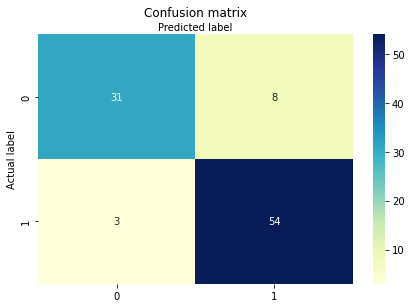

In [ ]:
#混淆矩陣視覺化(Heatmap)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Macro-average: {0}".format(metrics.f1_score(y_tst, y_pred, average =
'macro' )))
print("Micro-average: {0}".format(metrics.f1_score(y_tst, y_pred, average =
'micro')))
print(metrics.classification_report(y_tst, y_pred))
print(metrics.confusion_matrix(y_tst, y_pred))

Macro-average: 0.8784390468516173
Micro-average: 0.8854166666666666
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85        39
         1.0       0.87      0.95      0.91        57

    accuracy                           0.89        96
   macro avg       0.89      0.87      0.88        96
weighted avg       0.89      0.89      0.88        96

[[31  8]
 [ 3 54]]
